# Modelo Ross-Macdonald.

 Plantea un modelo **SIR - SI** donde se divide a la población en:

 * Humanos susceptibles.
 * Humanos Infectados.
 * Humanos Recuperados.

 y por el lado de los mosquitos:

 * Mosquitos susceptibles.
 * Mosquitos recuperados.

In [501]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Modelo.

Por problemas del minimize en la parte de búsqueda de parámetros, conviene reemplazar $(H_s + H_i + H_r)$ por $N_h$.

De lo contrario por el funcionamiento interno de minimize, cada uno de esos compartimentos decrece demasiado y termina dividiendo por cero.



In [509]:
def RossMacdonaldCicloMosquitos_model(x,t, params):

    # Desarmamos el vector
    Hs, Hi, Hr, Vs, Vi = x

    lam_v, mu_v, r_h, beta_h, beta_v = params

    # Planteamos las ecuaciones
    dHs_dt = - beta_h * Vi * Hs/Nh # - Tasa de transmision mosquito a humano * mosquitos infectados
    dHi_dt = beta_h * Vi * Hs/Nh - r_h * Hi
    dHr_dt = r_h * Hi
    dVs_dt = lam_v(t) * Vs - mu_v * Vs # Modela ciclo de vida de mosquitos en funcion del tiempo
    dVi_dt = beta_v * Vs * Hi/Nh - mu_v * Vi # Tasa de humano a mosquito * m susceptibles - tasa de mortalidad * m infectados

    return [dHs_dt, dHi_dt, dHr_dt, dVs_dt, dVi_dt]

# Parámetros.

In [503]:
# Parameters

mu_v = 1/20 # Tasa de mortalidad de mosquitos
r_h = 0.2 # Tasa de recuperacion de los humanos
beta_h = 0.02999 # Tasa de transmision mosquito a humano
beta_v = 0.009 # Tasa de transmision humano a mosquito

# Definicion de lambda (tasa de nacimiento de mosquitos en un tiempo t) como funcion que depende del tiempo
# Definición de las constantes
T = 365      # Periodo = 365 días
D = mu_v        # Valor medio = 0.1
A = 1/20        # Amplitud (para que no sea negativa)
B = 2 * np.pi / T # Frecuencia angular

# Función lambda con periodo 365 y valor medio 0.1
lam_v = lambda t: A*np.sin(B * t) + D


# Condiciones iniciales.

In [504]:
# Initial conditions

Nh = 1    # Total population
Nv = 1

Hi_0 = 1/1e6
Hs_0 = Nh - Hi_0
Hr_0 = 0

Vi_0 = 1/1e6
Vs_0 = Nv - Vi_0

x0 = [Hs_0, Hi_0, Hr_0, Vs_0, Vi_0] # Vector inicial

# Simulación del tiempo.

In [505]:
# Time solution -> Básicamente genera el eje x.
t_start = 0.0
t_end = 730
num_points = 1000
time_points = np.linspace(t_start, t_end, num_points) # Genera 1000 puntos entre 0 y 100 equiespaciados.

# Cálculo de soluciones.

In [506]:
params = [lam_v, mu_v, r_h, beta_h, beta_v]
sol = odeint(RossMacdonaldCicloMosquitos_model, x0, time_points,rtol=1e-6, atol=1e-12, args = (params,))

Hs = sol[:, 0]
Hi = sol[:, 1]
Hr = sol[:, 2]
Vs = sol[:, 3]
Vi = sol[:, 4]

Vs_norm = (Vs - Vs.min()) / (Vs.max() - Vs.min())
Vi_norm = (Vi - Vi.min()) / (Vi.max() - Vi.min())

# Ploteo.

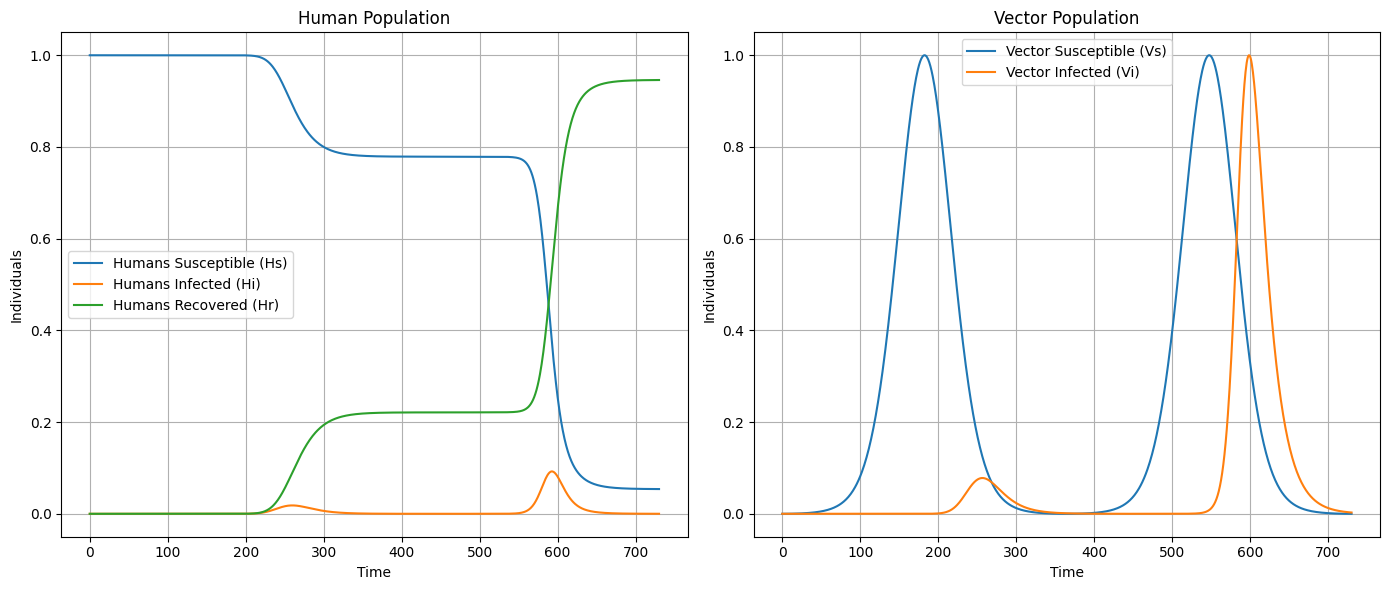

In [507]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# --- Gráfico de humanos ---
axes[0].plot(time_points, Hs, label='Humans Susceptible (Hs)')
axes[0].plot(time_points, Hi, label='Humans Infected (Hi)')
axes[0].plot(time_points, Hr, label='Humans Recovered (Hr)')
axes[0].set_title('Human Population')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Individuals')
axes[0].grid(True)
axes[0].legend()

# --- Gráfico de mosquitos ---
axes[1].plot(time_points, Vs_norm, label='Vector Susceptible (Vs)')
axes[1].plot(time_points, Vi_norm, label='Vector Infected (Vi)')
axes[1].set_title('Vector Population')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Individuals')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()